In [1]:
#read in the extracted text file
with open('diabetes_guideline_2019.txt') as f:
  text = f.read()
  
#print out the first 100 characters
print(text[:100])

The American Diabetes Association’s (ADA’s) Standards of Medical Care in Diabetes is updated and pub


In [2]:
!pip install python-utils

In [3]:
#Pre-processing

import utils

#get list of words
words = utils.preprocess(text)
print(words[:100])

['the', 'american', 'diabetes', '<LEFT_PAREN>', '<RIGHT_PAREN>', 'standards', 'of', 'medical', 'care', 'in', 'diabetes', 'is', 'and', 'published', 'annually', 'in', 'a', 'to', 'the', 'of', 'diabetes', 'care', '<PERIOD>', 'the', 'professional', '<COMMA>', 'which', '<COMMA>', 'diabetes', '<COMMA>', '<LEFT_PAREN>', '<RIGHT_PAREN>', '<COMMA>', 'and', 'health', '<COMMA>', 'the', 'standards', '<PERIOD>', 'the', 'standards', 'include', 'the', 'most', 'recommendations', 'for', 'and', 'adults', 'and', 'children', 'with', 'all', 'of', 'diabetes', '<PERIOD>', 'a', '<COMMA>', 'b', '<COMMA>', 'c', '<COMMA>', 'or', 'e', 'to', 'the', 'evidence', 'level', 'that', 'each', 'recommendation', '<PERIOD>', '•', 'evidence', 'from', '<COMMA>', 'controlled', 'trials', 'that', 'are', '•', 'evidence', 'from', '•', 'evidence', 'from', 'controlled', 'or', '•', 'or', 'clinical', 'this', 'is', 'an', 'abridged', 'of', 'the', '2019', 'standards', 'the', 'recommendations']


In [4]:
#Print stats about this word data
print("Total words in text: {}".format(len(words)))
print("Unique words: {}".format(len(set(words)))) #'set' removes any duplicate words

Total words in text: 13345
Unique words: 429


In [5]:
#Creating dictionaries to convert words to integers and integers to words
vocab_to_int, int_to_vocab = utils.create_lookup_tables(words)
int_words = [vocab_to_int[word] for word in words]

print(int_words[:100])

[4, 176, 5, 13, 14, 53, 3, 86, 20, 6, 5, 17, 2, 87, 247, 6, 11, 9, 4, 3, 5, 20, 1, 4, 364, 0, 306, 0, 5, 0, 13, 14, 0, 2, 52, 0, 4, 53, 1, 4, 53, 110, 4, 167, 38, 7, 2, 44, 2, 141, 8, 60, 3, 5, 1, 11, 0, 24, 0, 55, 0, 12, 39, 9, 4, 81, 168, 45, 229, 169, 1, 10, 81, 73, 0, 365, 210, 45, 23, 10, 81, 73, 10, 81, 73, 365, 12, 10, 12, 33, 111, 17, 32, 151, 3, 4, 97, 53, 4, 38]


In [6]:
#Subsampling for words in int_words
from collections import Counter
import random
import numpy as np

treshold = 1e-5
word_counts = Counter(int_words)
print(list(word_counts.items())[0]) #dictionary of int_words, how many times they appear

total_count = len(int_words)
freqs = {word: count/total_count for word, count in word_counts.items()}
p_drop = {word:1-np.sqrt(treshold/freqs[word]) for word in word_counts}

#discard some frequent words, according to the subsampling equation
#create a new list of words for training
train_words = [word for word in int_words if random.random() < (1 - p_drop[word])]

print(train_words[:100])

(4, 407)
[364, 168, 81, 365, 248, 177, 20, 249, 250, 281, 0, 251, 153, 7, 369, 5, 59, 0, 87, 310, 60, 371, 73, 1, 4, 211, 13, 253, 373, 18, 48, 194, 105, 284, 284, 306, 61, 3, 15, 143, 22, 41, 64, 12, 84, 106, 214, 201, 186, 82, 104, 58, 57, 12, 200, 260, 325, 44, 201, 12, 70, 57, 176, 176, 129, 12, 14, 33, 185, 231, 292, 120, 70, 37, 200, 161, 64, 325, 83, 262, 78, 78, 128, 162, 42, 113, 134, 128, 47, 232, 213, 56, 106, 159, 113, 5, 72, 57, 202, 9]


In [0]:
#Making batches
def get_targets(words, idx, window_size=5):
  #Get a list of words in a window around an index
  
  R = np.random.randint(1, window_size+1)
  start = idx - R if (idx - R) > 0 else 0
  stop = idx + R
  target_words = words[start:idx] + words[idx+1:stop+1]
  
  return list(target_words)

In [8]:
#Test the code
#Run this cell multiple times to check for random window selection

int_text = [i for i in range(10)]
print('Input', int_text)
idx=5 #word index of interest

target = get_targets(int_text, idx=idx, window_size=5)
print('Target:', target) #get indices around idx

Input [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Target: [0, 1, 2, 3, 4, 6, 7, 8, 9]


In [0]:
#Generating batches

def get_batches(words, batch_size, window_size=5):
  #Create a generator of word batches as a tuple (inputs, targets)
  
  n_batches = len(words)//batch_size
  
  #Only full batches
  words = words[:n_batches*batch_size]
  
  for idx in range(0, len(words), batch_size):
    x, y = [], []
    batch = words[idx:idx+batch_size]
    for ii in range(len(batch)):
      batch_x = batch[ii]
      batch_y = get_targets(batch, ii, window_size)
      y.extend(batch_y)
      x.extend([batch_x]*len(batch_y))
      yield x, y

In [10]:
int_text = [i for i in range(20)]
x,y = next(get_batches(int_text, batch_size=4, window_size=10))

print('x\n', x)
print('y\n', y)

x
 [0, 0, 0]
y
 [1, 2, 3]


In [0]:
#Validation

def cosine_similarity(embedding, valid_size=16, valid_window=100, device='cpu'):
  #Returns the cosine similarity of validation words with words in the embedding matrix
  
  #Calculating the cosine similarity between some random words and embedding vectors
  #With the similarities, we can look at what words are close to our random words
  # sim = (a.b)/|a||b|
  
  embed_vectors = embedding.weight
  
  #magnitude of embedding vectors, |b|
  magnitudes = embed_vectors.pow(2).sum(dim=1).sqrt().unsqueeze(0)
  
  #pick N words from our ranges (0,window) and (1000,1000+valid_window)
  #lower id implies more frequent
  valid_examples = np.array(random.sample(range(valid_window), valid_size//2))
  valid_examples = np.append(valid_examples, 
                             random.sample(range(100,100+valid_window), valid_size//2))
  valid_examples = torch.LongTensor(valid_examples).to(device)
  valid_vectors = embedding(valid_examples)
  similarities = torch.mm(valid_vectors, embed_vectors.t())/magnitudes
  
  return valid_examples, similarities

In [0]:
#Define the skipgram model
import torch
from torch import nn
import torch.optim as optim

In [0]:
class SkipGram(nn.Module):
  def __init__(self, n_vocab, n_embed):
    super().__init__()
    
    self.embed = nn.Embedding(n_vocab, n_embed)
    self.output = nn.Linear(n_embed, n_vocab)
    self.log_softmax = nn.LogSoftmax(dim=1)
    
  def forward(self, x):
    x = self.embed(x)
    scores = self.output(x)
    log_ps = self.log_softmax(scores)
    
    return log_ps

In [14]:
#Training
#check if GPU is available

device = 'cuda' if torch.cuda.is_available() else 'cpu'

embedding_dim = 100

model = SkipGram(len(vocab_to_int), embedding_dim).to(device)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

print_every = 500
steps = 0
epochs = 5

#train for some number of epochs
for e in range(epochs):
  
  #get input and target batches
  for inputs, targets in get_batches(train_words, 512):
    steps += 1
    inputs, targets = torch.LongTensor(inputs), torch.LongTensor(targets)
    inputs, targets = inputs.to(device), targets.to(device)
    
    log_ps = model(inputs)
    loss = criterion(log_ps, targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if steps % print_every == 0:
      #getting examples and similarities
      valid_examples, valid_similarities = cosine_similarity(model.embed, device=device)
      _, closest_idxs = valid_similarities.topk(6) #topk highest similarities
      
      valid_examples, closest_idxs = valid_examples.to('cpu'), closest_idxs.to('cpu')
      for ii, valid_idx in enumerate(valid_examples):
        closest_words = [int_to_vocab[idx.item()] for idx in closest_idxs[ii]][1:]
        print(int_to_vocab[valid_idx.item()] + " | " + ', '.join(closest_words))
      print("...")

a1c | using, achieved, inhibitors, discharge, 5%
<LEFT_PAREN> | must, and/or, additional, blood, or
treatment | meals, adverse, planning, glucose-lowering, taking
recommended | type, results, indicated, no, print
management | more, meals, american, effects, individual
not | behavioral, smoking, 7, strategies, md
if | without, two, sglt2, surgery, patient
blood | creatinine, <LEFT_PAREN>, must, failure, treatment
plan | treat, continuous, 4, including, life
additional | it, <LEFT_PAREN>, mmol/l, glycemic, routine
metabolic | bmi, professional, prandial, measured, agents
history | reduce, and/or, when, a, therapy
some | treat, 7, in, quality, assessed
exercise | symptoms, dietary, print, e, general
heart | events, 73, trials, most, hospital
considered | increased, levels, by, hypertension, cde
...
of | achieve, diabetesjournals, ckd, cost, initial
mg/dl | 9, professional, functional, does, vascular
patient | normal, see, a1c, cognitive, standards
patients | major, carbohydrate, cardiovas

In [0]:
#Visualizing the word vectors
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [0]:
#Getting embeddings from the embedding layer of our model, by name
embeddings = model.embed.weight.to('cpu').data.numpy()

In [0]:
viz_words = 300
tsne = TSNE()
embed_tsne = tsne.fit_transform(embeddings[:viz_words,:])

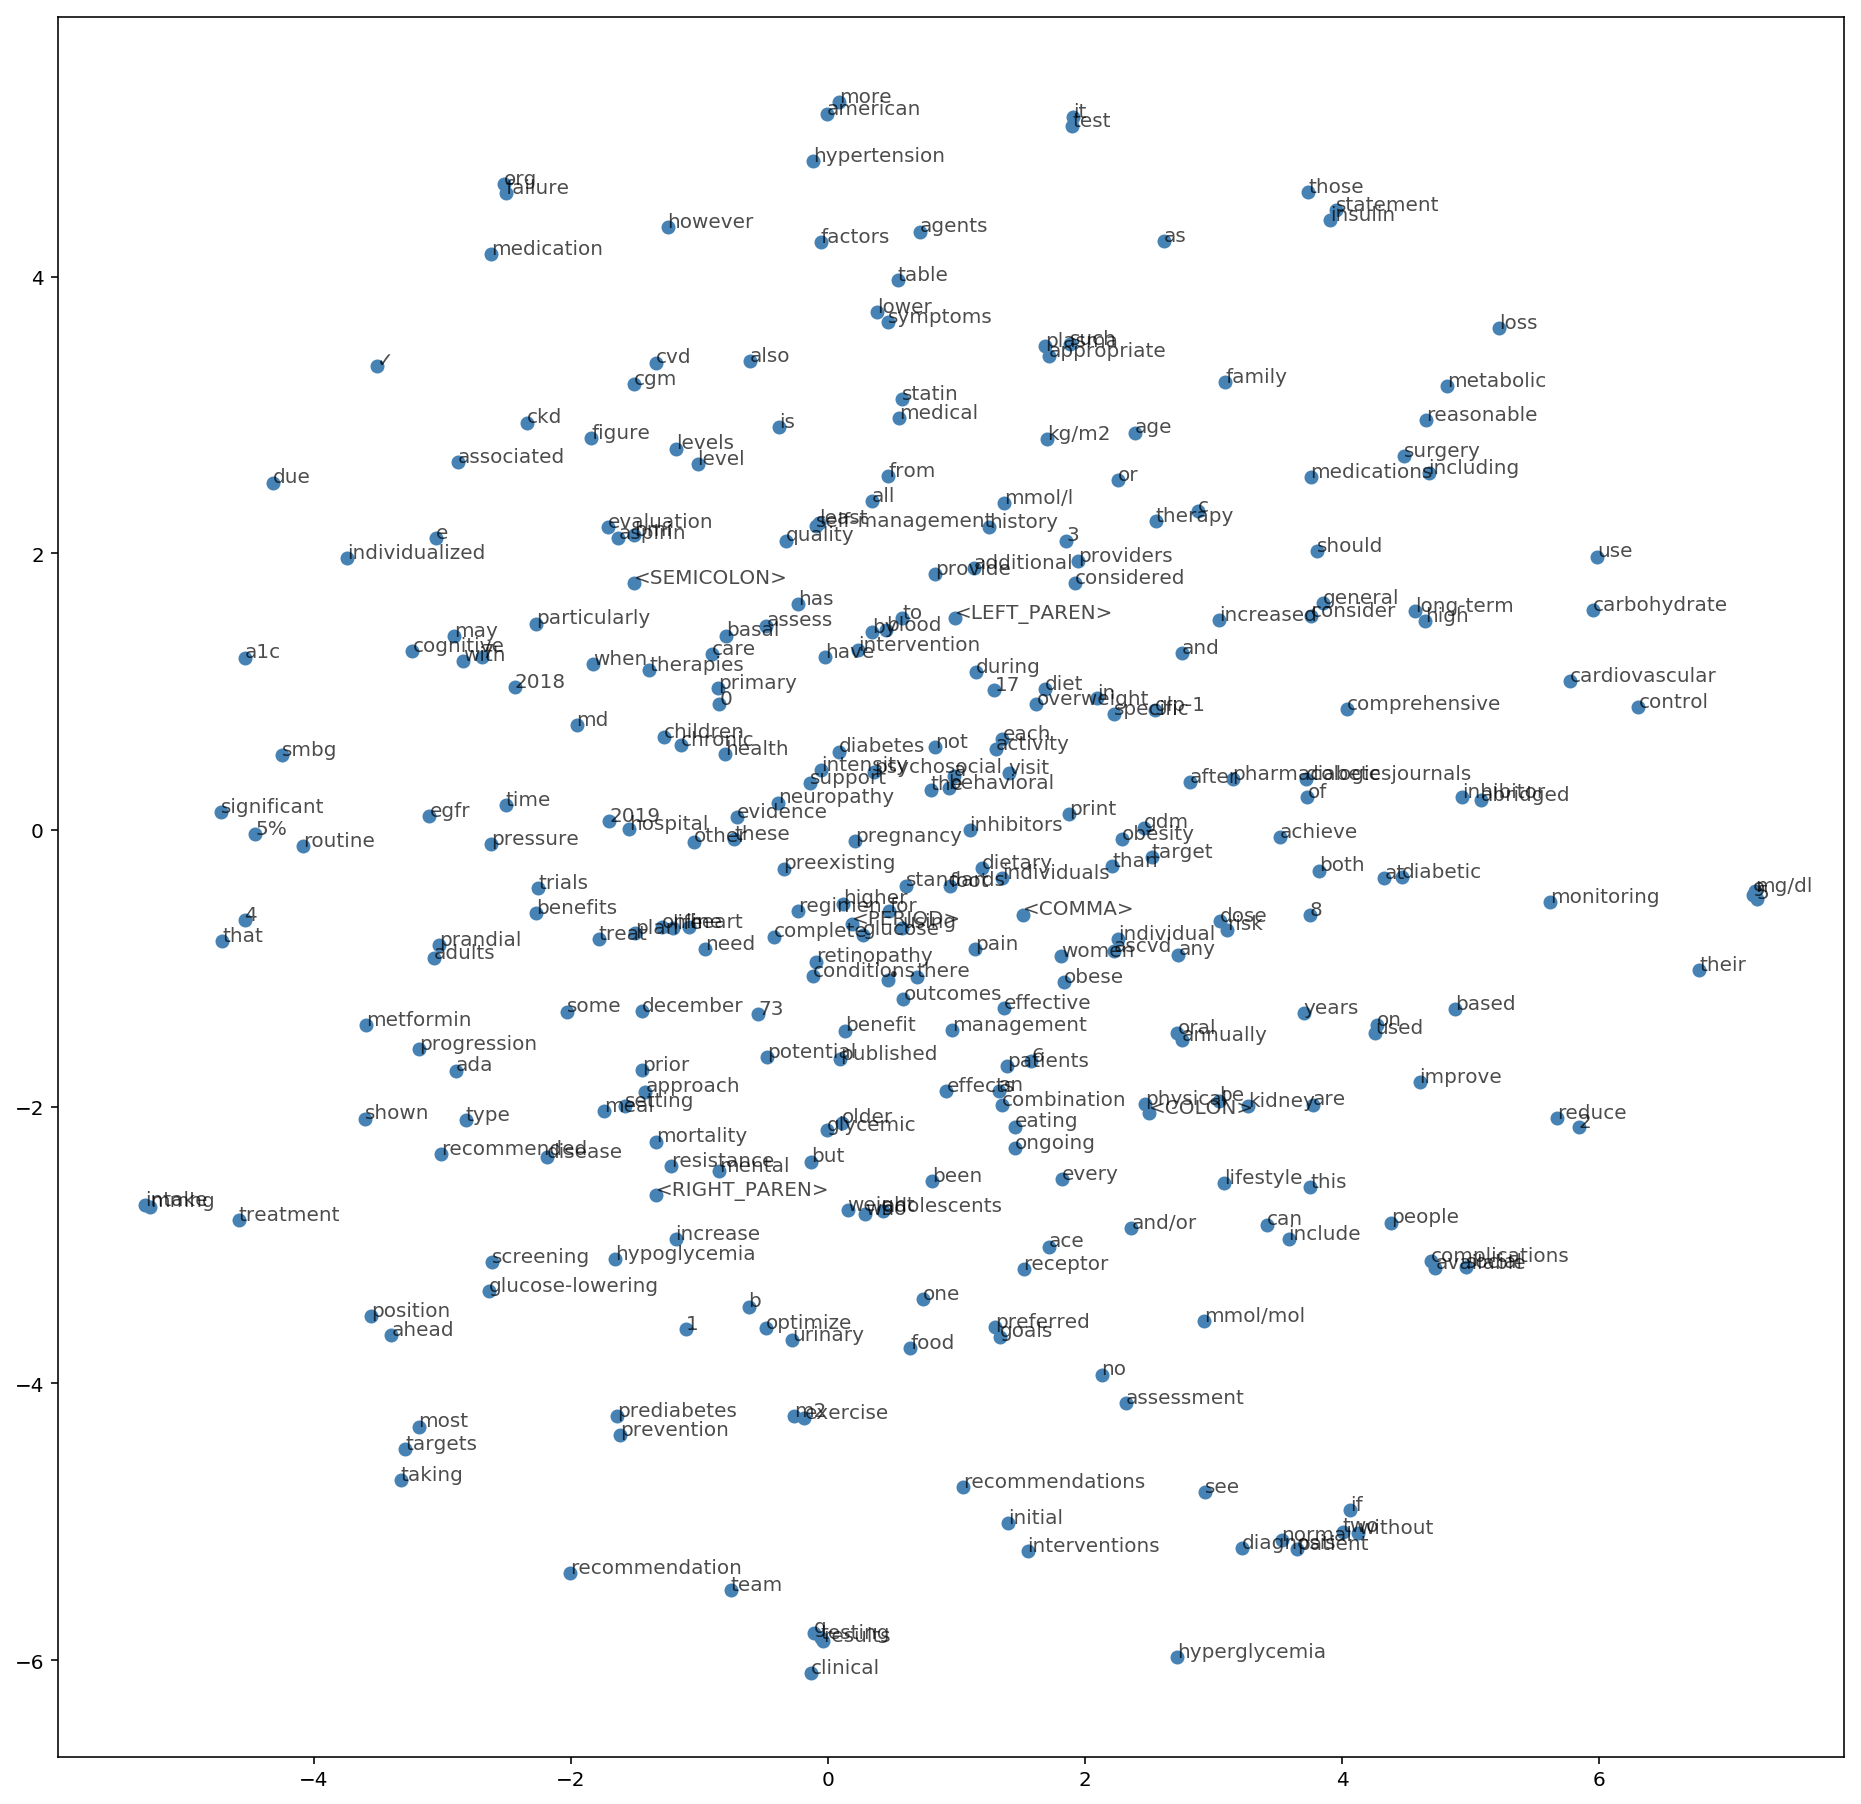

In [20]:
fig, ax = plt.subplots(figsize=(16,16))
for idx in range(viz_words):
  plt.scatter(*embed_tsne[idx,:], color='steelblue')
  plt.annotate(int_to_vocab[idx], (embed_tsne[idx,0], embed_tsne[idx,1]), alpha=0.7)